# Pollution and mental performance in BCN

## Inicialització

In [1]:
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')

## Anàlisi exploratori de dades inicial

In [3]:
print(f"Les seves dimensions són: {df.shape[0]} individus i {df.shape[1]} variables")
print(f"Llistat de variables: {list(df.columns)}")

Les seves dimensions són: 3348 individus i 95 variables
Llistat de variables: ['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour', 'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia', 'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador', 'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control', 'z_performance', 'z_mean_incongruent', 'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg', 'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day', 'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary', 'precip_24h_binary', 'ma

Codifiquem algunes variables com a categòriques, i n'eliminem algunes ja que no són rellevants o contenen informació repetida en altres.
Més endavant valorarem si, estudiant les correlacions, cal treure'n més.

In [4]:
list_to_cat = ['ID_Zenodo', 'year', 'month', 'day', 'dayoftheweek', 'hour',
               'mentalhealth_survey', 'bienestar', 'energia', 'estres', 'sueno', 
               'occurrence_stroop', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in list_to_cat:
    df[name] = df[name].astype('category')

In [5]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

In [6]:
eliminations = ['date_all', 'mean_incongruent', 'correct', 'response_duration_ms',
                'mean_congruent', 'horasfuera', 'performance', 'inhib_control', 'z_mean_incongruent',
                'z_inhib_control', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
                'no2gps_24h_x30', 'min_gps', 'hour_gps', 'sec_noise55_day', 'sec_noise65_day',
                'sec_greenblue_day', 'Houron', 'Houroff', 'start_day', 'start_month', 'start_year',
                'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime', 
                'Totaltime_estimated', 'mentalhealth_survey', 'stroop_test', 'occurrence_stroop']
df = df.drop(eliminations, axis=1)

Procedim a realitzar alguns gràfics

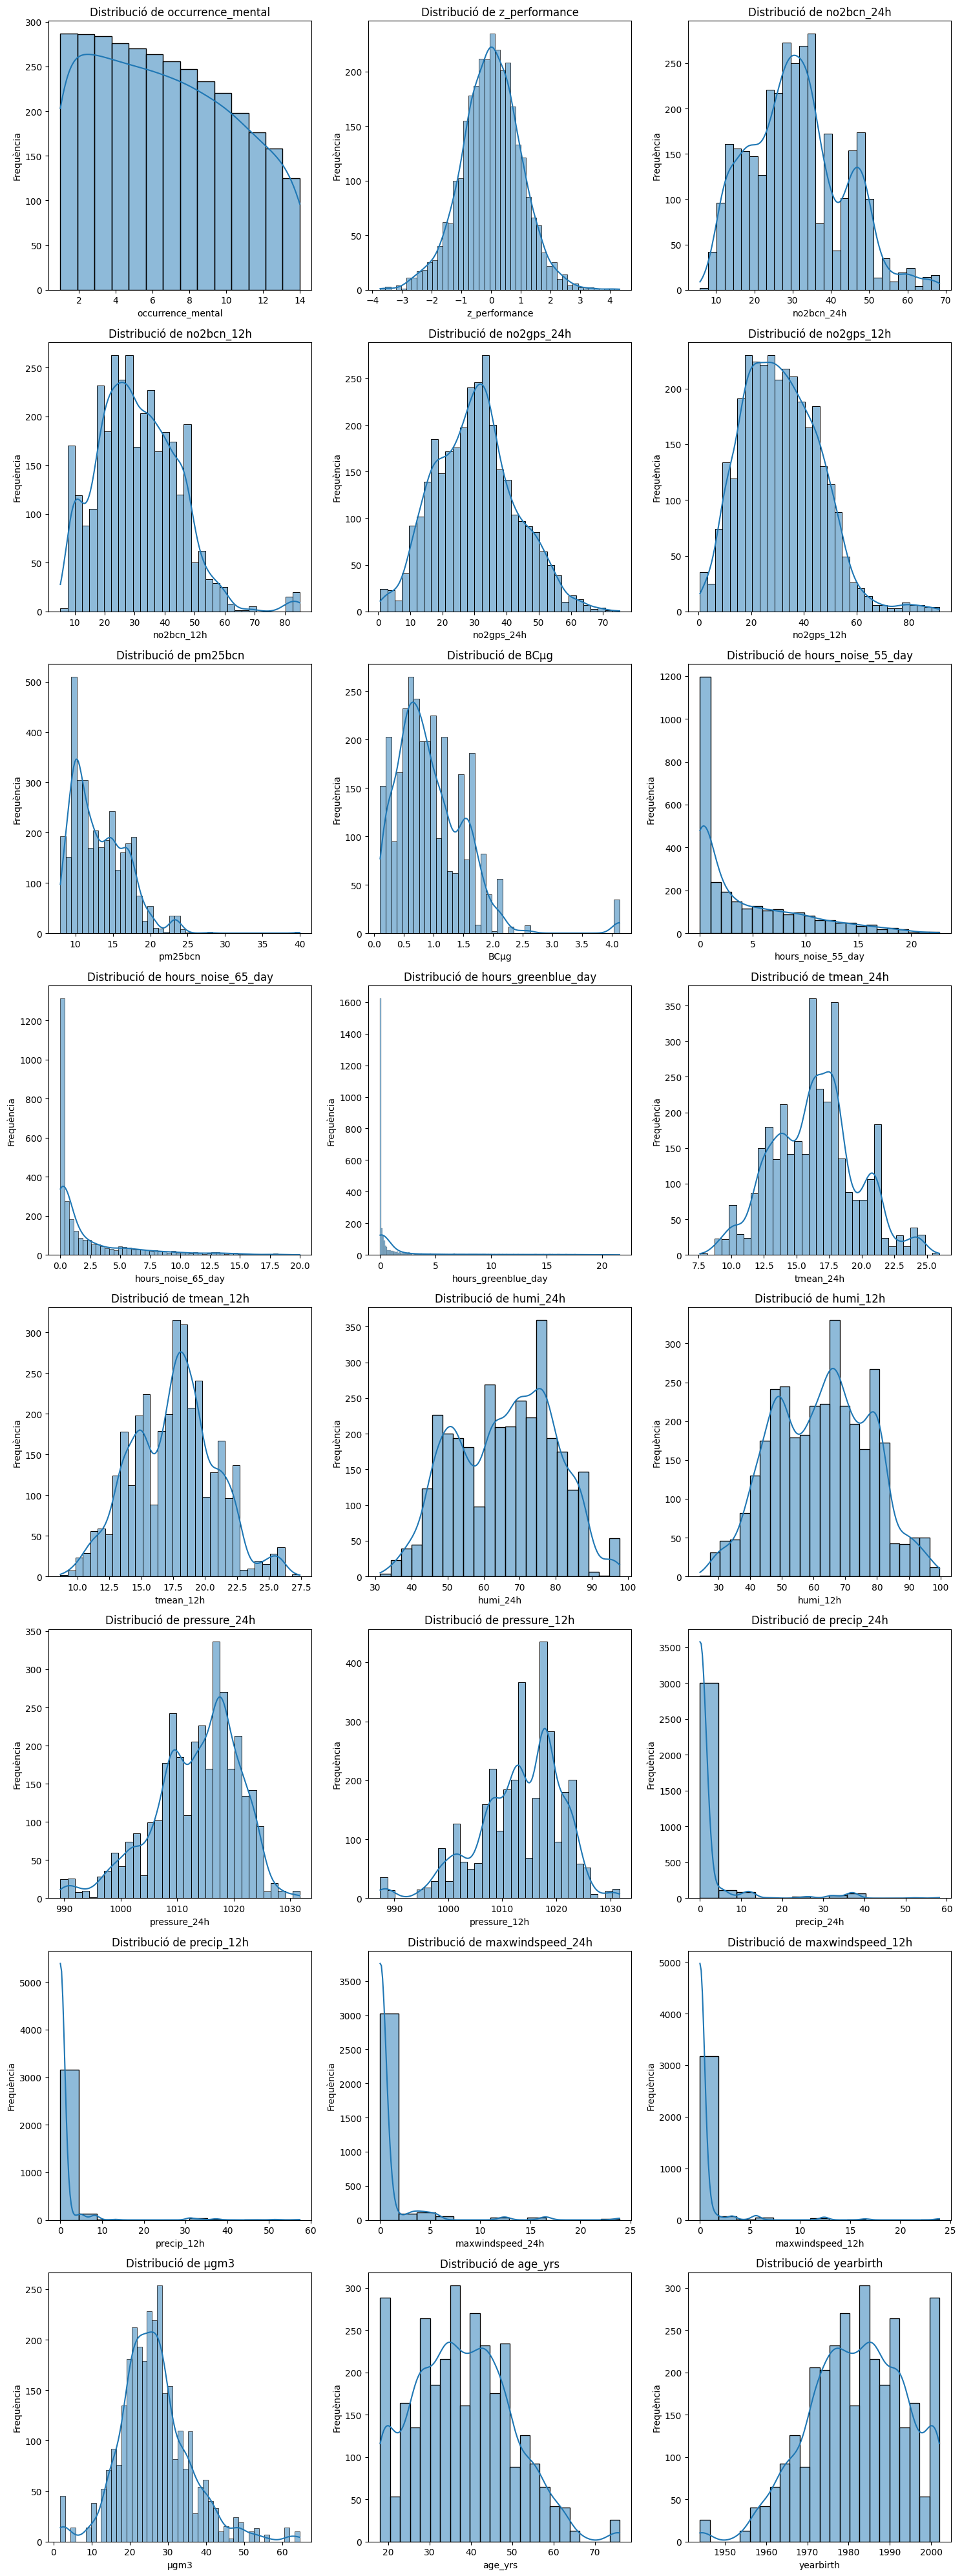

In [7]:
# Gráfics de distribució per variables numèriques
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


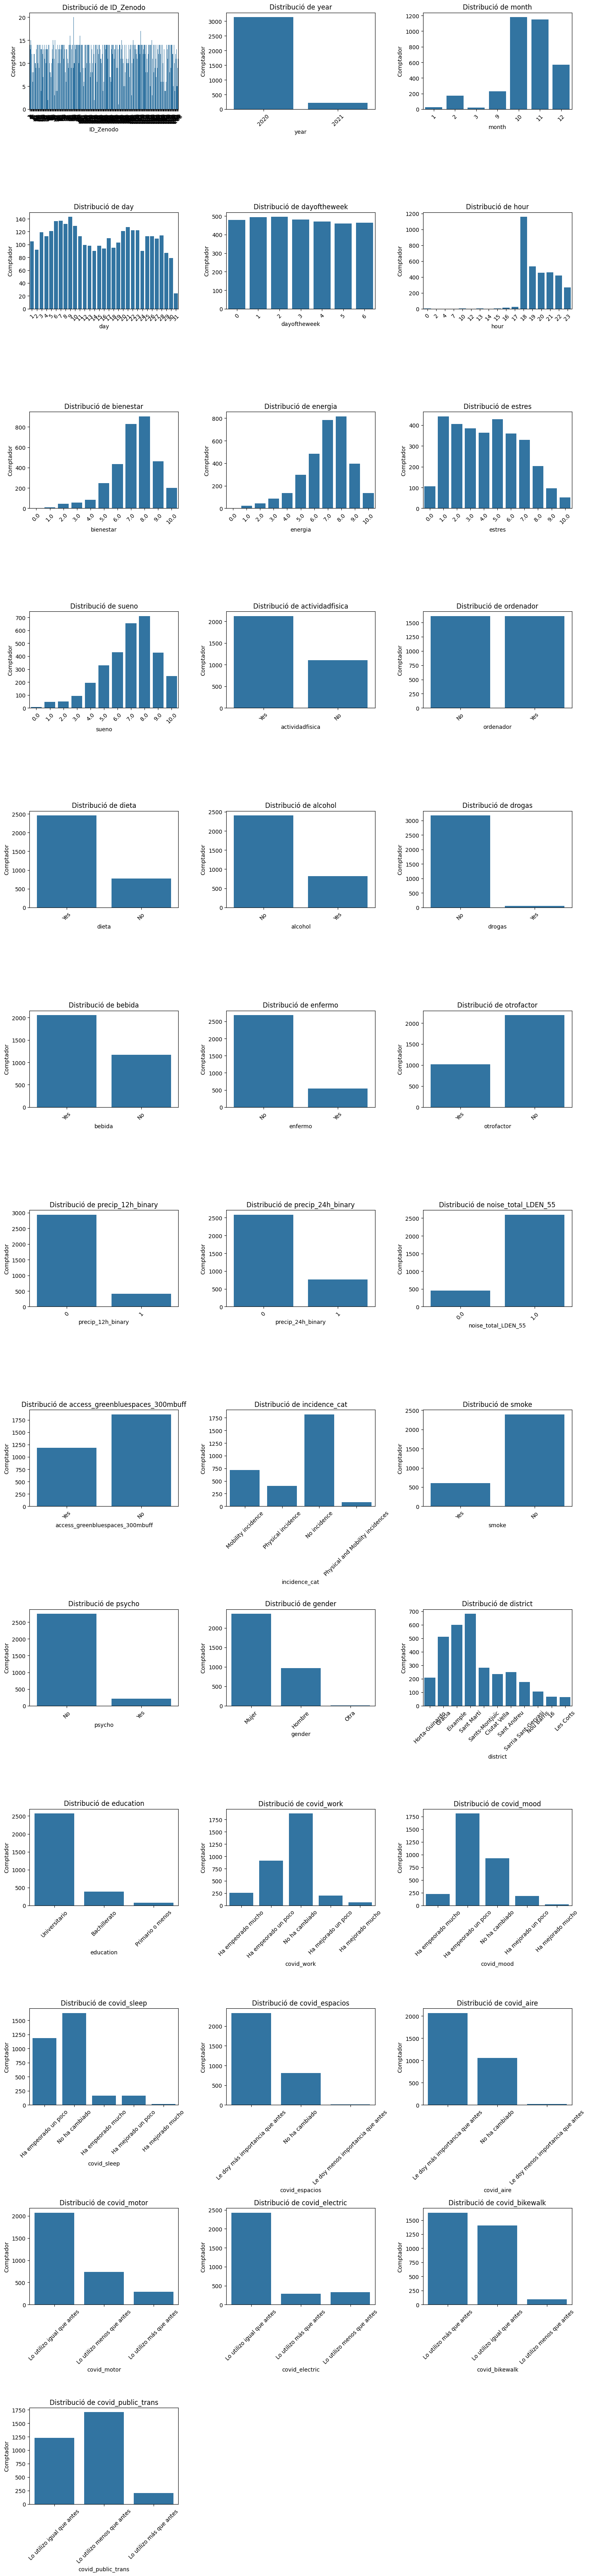

In [8]:
# Gráfics de barres per variables categòriques
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=df, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

Visualitzem els missing values per variable

,missing_values
occurrence_mental,68
bienestar,75
energia,141
estres,175
sueno,158
actividadfisica,116
ordenador,121
dieta,122
alcohol,126
drogas,121


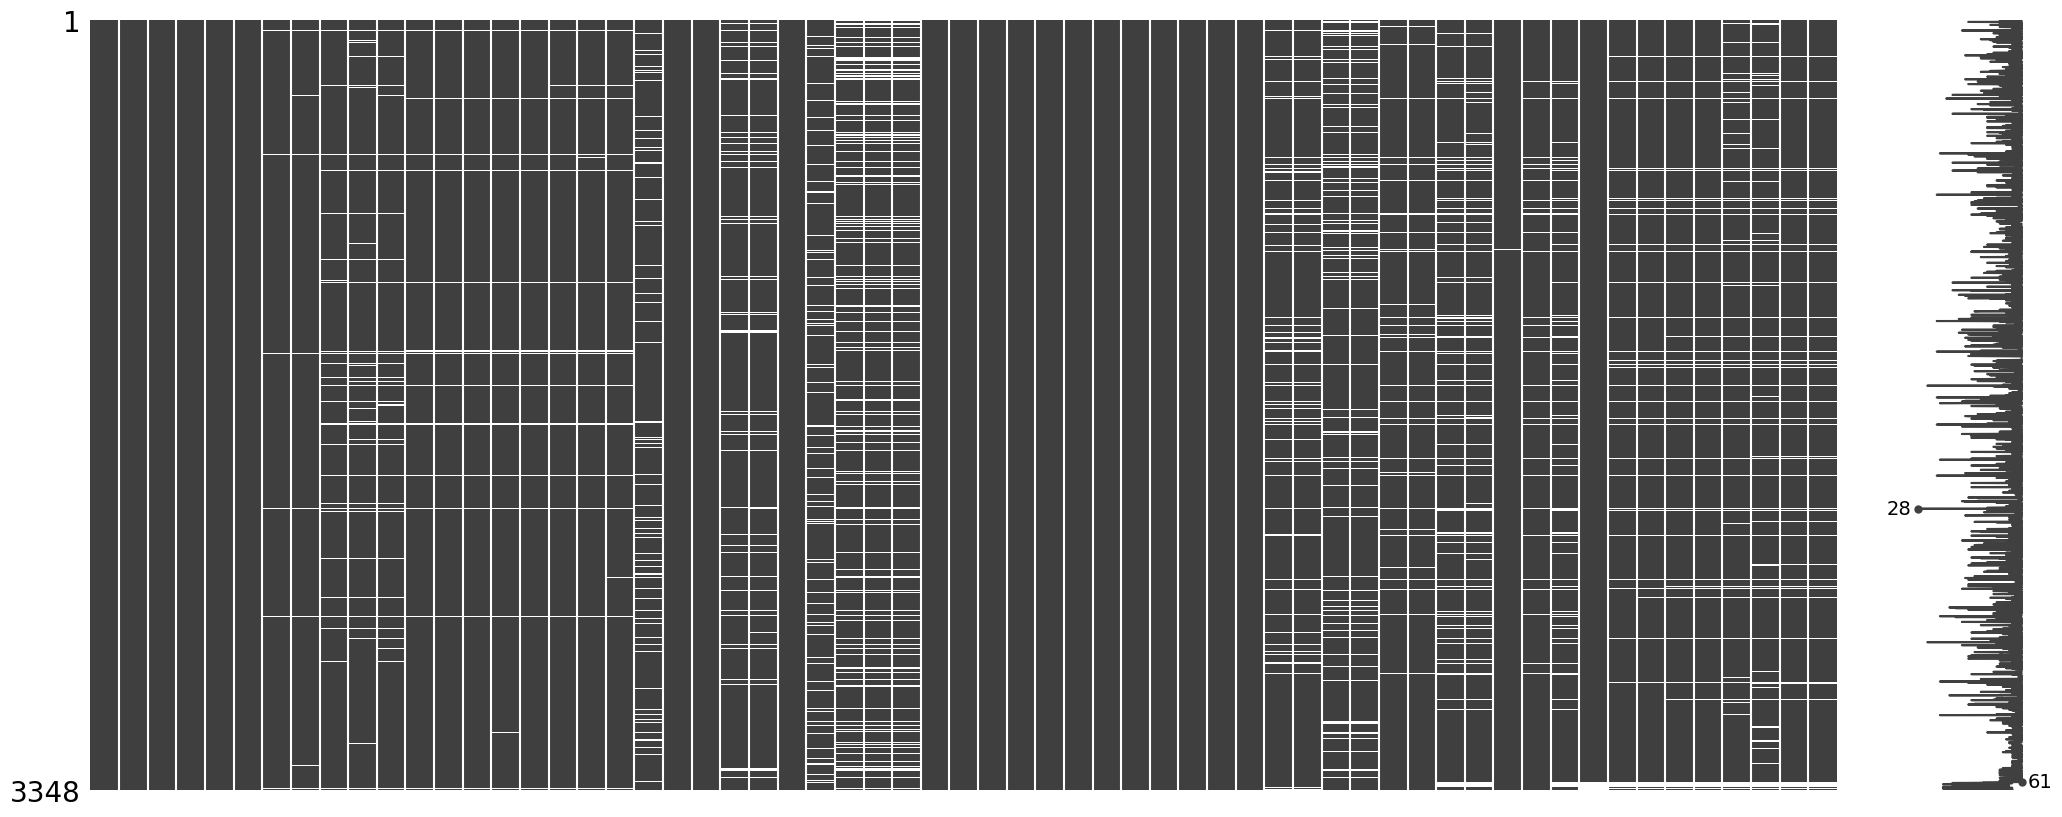

In [9]:
import missingno as msno
msno.matrix(df)

missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

In [10]:
df.shape

(3348, 61)

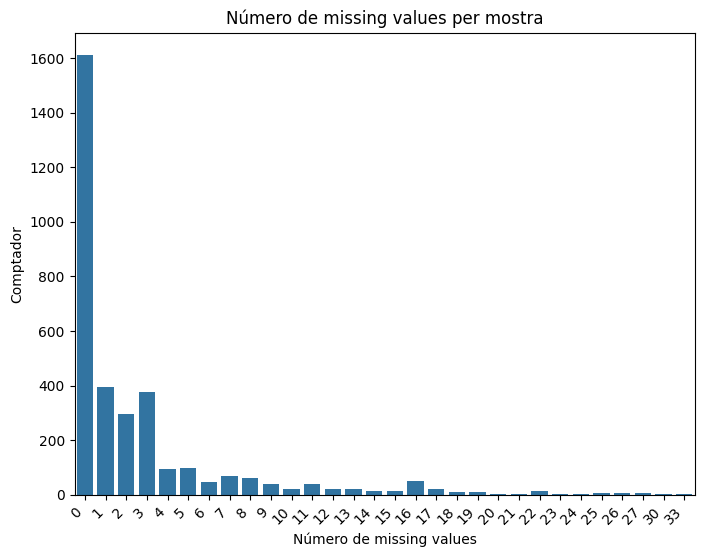

In [11]:
# Barplot amb el numero de missing values per fila 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.isnull().sum(axis=1))
plt.title(f'Número de missing values per mostra')
plt.xlabel('Número de missing values')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()


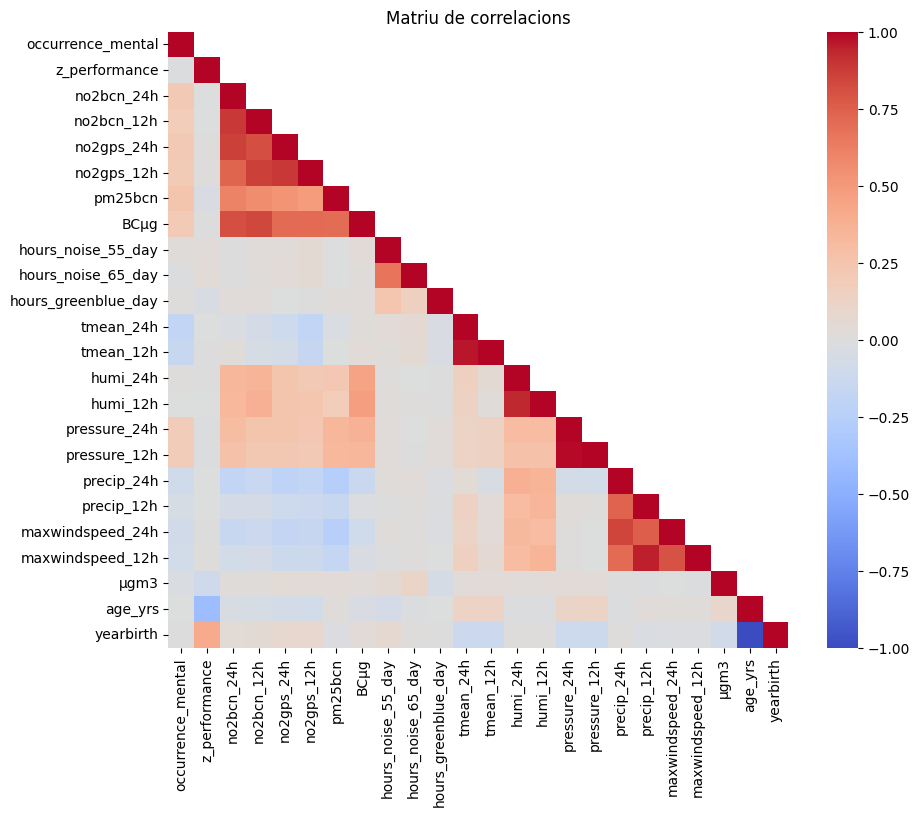

In [12]:
# Creem un nou DataFrame només amb les variables numèriques
df_numeric = df.select_dtypes(include=[np.number])

# Calculem la matriu de correlació
corr = df_numeric.corr()

# Creem una màscara per a la part superior del triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plotejem la matriu de correlació
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title('Matriu de correlacions')
plt.show()

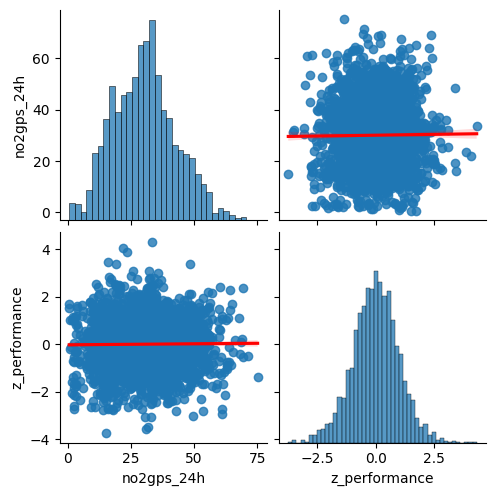

In [14]:
df_numeric = df[['no2gps_24h', 'z_performance']]
sns.pairplot(df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

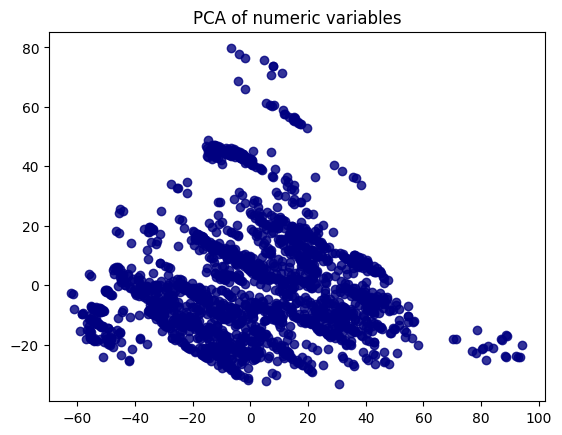

In [13]:
pca = PCA(n_components=2)

no_miss = df_numeric.dropna()
X_r = pca.fit_transform(no_miss)

# Plot PCA results
plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], color='navy', alpha=.8)
plt.title('PCA of numeric variables')

plt.show()

## Preprocessament

CAL SEPARAR EN TRAIN I TEST PERÒ ÉS PER VEURE MÉS O MENYS QUÈ PODEM FER

Eliminem els missing de performance

In [83]:
deleted_na_perf = df.dropna(subset="z_performance")

missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
occurrence_mental,68
bienestar,75
energia,139
estres,170
sueno,155
actividadfisica,114
ordenador,119
dieta,120
alcohol,123
drogas,119


In [64]:
deleted_na_perf.shape

(3046, 61)

In [84]:
deleted_na_perf = deleted_na_perf[deleted_na_perf.isnull().sum(axis=1) < 10]

In [57]:
deleted_na_perf.shape

(2796, 61)

In [94]:
missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,5
ordenador,7
dieta,7
alcohol,11
drogas,7
bebida,8


In [118]:
deleted_na_cols = deleted_na_perf.dropna(axis=1, thresh=len(deleted_na_perf)-280)

In [119]:
missing_values1 = deleted_na_cols.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,5
ordenador,7
dieta,7
alcohol,11
drogas,7
bebida,8


<Axes: >

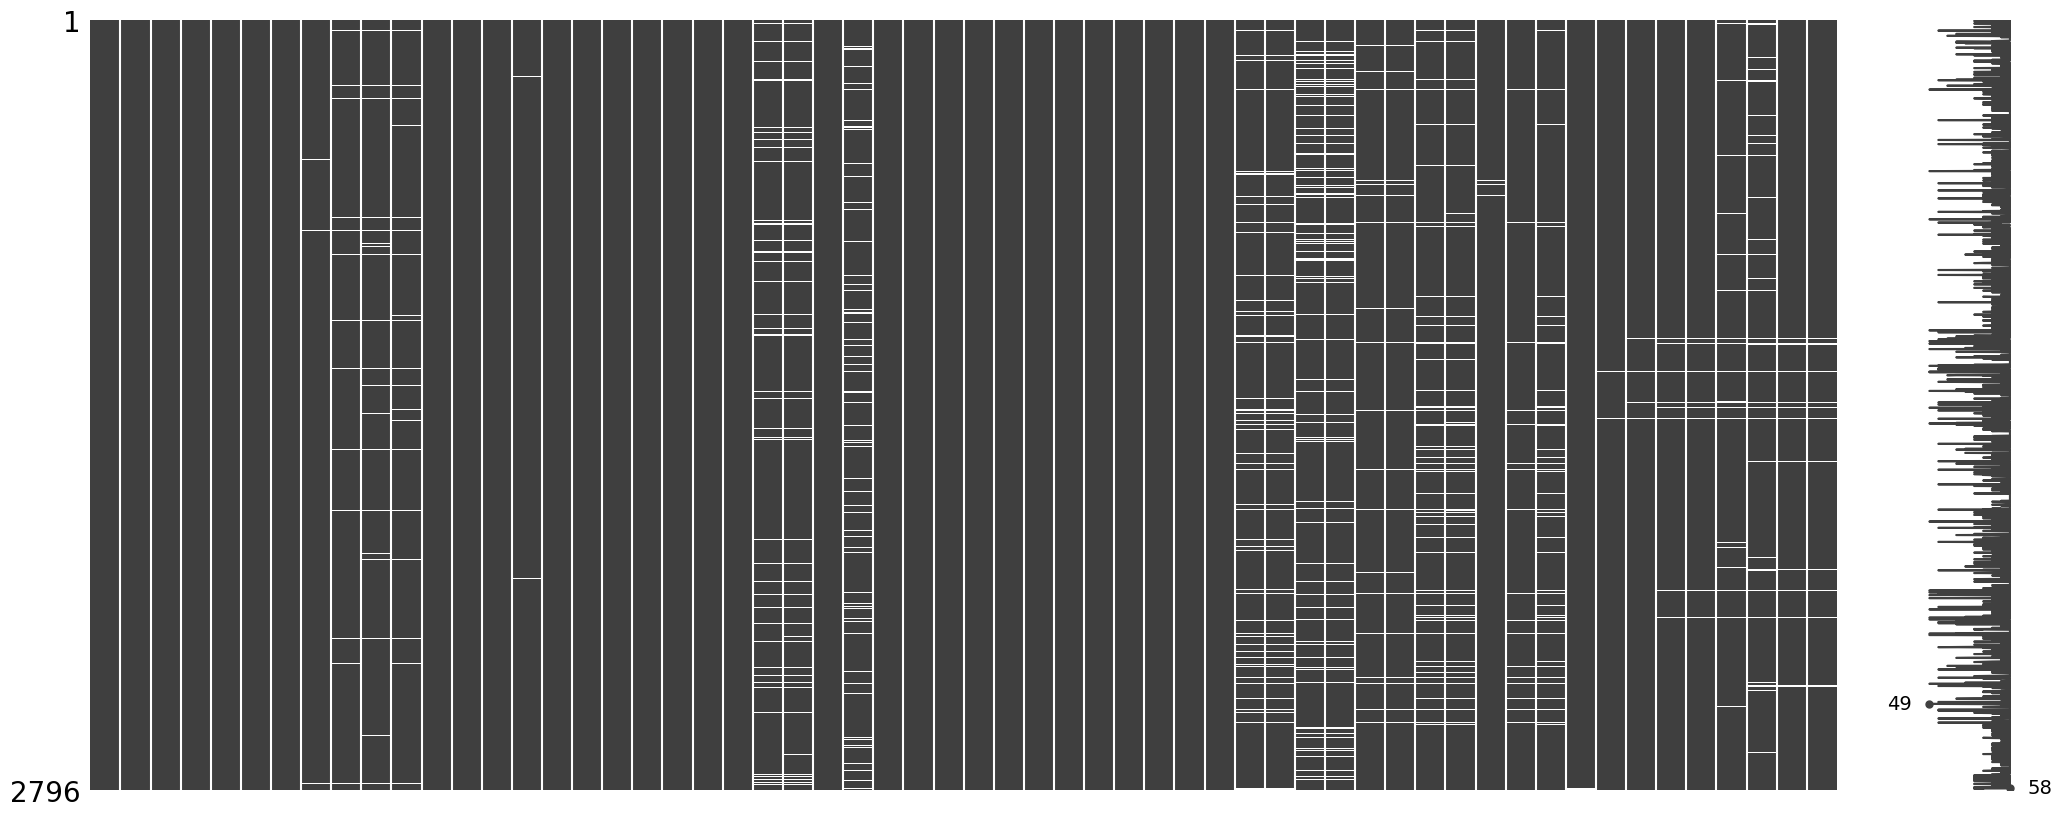

In [121]:
msno.matrix(deleted_na_cols)

In [59]:
unique_na = deleted_na_perf.drop_duplicates("ID_Zenodo")

In [60]:
missing_values1 = unique_na.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,1
energia,6
estres,10
sueno,7
actividadfisica,1
ordenador,1
dieta,1
alcohol,1
drogas,1
bebida,2


In [268]:
from sklearn.model_selection import train_test_split
X = deleted_na_cols[deleted_na_cols.columns.drop("z_performance")]
y = deleted_na_cols["z_performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Usem un imputador per emplenar la resta de missings

In [269]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num_cols = X_train.select_dtypes(include='number').columns

numeric_delna = X_train[num_cols]
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(numeric_delna)

X_train[num_cols] = imp_mean.transform(numeric_delna)
X_test[num_cols] = imp_mean.transform(X_test[num_cols])

Ens queden les categòriques. Emplenem amb KNN

In [273]:
from sklearn.neighbors import NearestNeighbors

class KNNImputer:
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
    def fit(self, X, numeric_cols):
        self.X = X.copy() # suposem que les numeriques estan imputades
        self.numeric = numeric_cols
        self.vecinos = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X.dropna()[numeric_cols])
    def _get_mode(self, variable, indexs):
        vecinos = [self.X.iloc[[i]].iloc[0] for i in indexs[0]]
        valors = [v.iloc[variable] for v in vecinos]
        unique, counts = np.unique(valors, return_counts = True)
        mode = unique[np.argmax(counts)]
        return mode
    def _impute_row(self, row):
        dist, indexs = self.vecinos.kneighbors([row[self.numeric]])
        for variable, value in enumerate(row.isna()):
            if value:
                mode = self._get_mode(variable, indexs)
                row.iloc[variable] = mode
        return row
    def transform(self, X):
        X_imputed = []
        for ind, row in X.iterrows():
            new_row = self._impute_row(row)
            X_imputed.append(new_row)
        return pd.DataFrame(X_imputed, columns=X.columns)

In [274]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

imputer = KNNImputer()

imputer.fit(X_train, num_cols)

X_train_new = imputer.transform(X_train)

X_train_new.head()

,ID_Zenodo,year,month,day,dayoftheweek,hour,occurrence_mental,bienestar,energia,estres,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
2327,37,2020,10,10,5,19,11.0,8.0,8.0,0.0,...,Universitario,No ha cambiado,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo menos que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
1733,199,2020,11,11,2,22,3.0,8.0,9.0,8.0,...,Universitario,No ha cambiado,Ha mejorado un poco,No ha cambiado,No ha cambiado,No ha cambiado,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo menos que antes
1038,245,2020,12,14,0,18,9.0,1.0,1.0,1.0,...,Bachillerato,Ha empeorado un poco,Ha empeorado un poco,Ha empeorado mucho,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes
284,23,2020,9,22,1,18,2.0,5.0,7.0,1.0,...,Universitario,Ha empeorado un poco,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo menos que antes
1940,95,2020,10,8,3,21,2.0,7.0,7.0,3.0,...,Universitario,No ha cambiado,Ha empeorado un poco,Ha empeorado un poco,No ha cambiado,No ha cambiado,Lo utilizo menos que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes


In [267]:
X_train_new.shape

(2236, 57)

In [42]:
# Mode imputation
"""
for col in deleted_na_perf.columns:
    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])
"""

Eliminem les variables amb molta correlació o que no ens interessen

In [72]:
not_interessting = ['yearbirth', 'year', 'month', 'day', 'hour', 'mentalhealth_survey', 'stroop_test', 'µgm3']
deleted_na_perf = deleted_na_perf.drop(covid, axis=1)
deleted_na_perf = deleted_na_perf.drop(not_interessting, axis=1)
deleted_na_perf

KeyError: "['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire', 'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans'] not found in axis"

Escalem les variables

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = deleted_na_perf.select_dtypes(include='number').columns
deleted_na_perf[num_cols] = scaler.fit_transform(deleted_na_perf[num_cols])

Detectem outliers usant un Isolation Forest

In [70]:
from sklearn.ensemble import IsolationForest

outliers = IsolationForest(contamination=0.05, random_state=0).fit_predict(deleted_na_perf[num_cols])

deleted_na_perf['Outlier'] = outliers

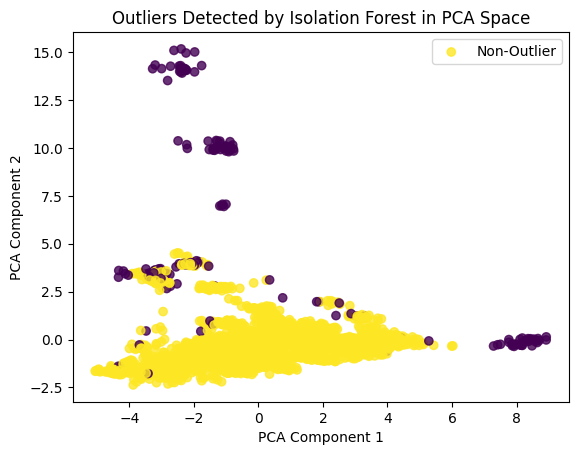

In [71]:
pca = PCA(n_components=2)

X_r = pca.fit_transform(deleted_na_perf[num_cols])

# Plot PCA results
plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], c=deleted_na_perf['Outlier'], alpha=.8, label='Non-Outlier')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Outliers Detected by Isolation Forest in PCA Space')
plt.legend()
plt.show()

In [74]:
deleted_na_perf = deleted_na_perf.drop("Outlier", axis=1)
deleted_na_perf.to_csv("./preprocessed_data.csv")